# Fundamentals of Machine Learning - Exercise 3
### Deadline: 15.12.2020, 16:00

- Johannes Kammerer, Zhao Sun, Tong Yu


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
#display(Markdown(string))


# 4. Data Generation with QDA
## Load and select dataset

In [3]:
from sklearn . datasets import load_digits
from sklearn import model_selection

digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print('data',data.shape, 'images',images.shape, 'target',target.shape, 'target_names',target_names.shape)

# Filter dataset for 0 and 6
data_select = data[np.logical_or(target==0, target ==6)]
target_select = target[(target==0)|(target ==6)]
print('selecting 0&6 only: data', data_select.shape, 'target',target_select.shape)


data (1797, 64) images (1797, 8, 8) target (1797,) target_names (10,)
selecting 0&6 only: data (359, 64) target (359,)


## fit_qda() from Ex02

In [4]:
def fit_qda(training_features, training_labels):
    ''' INPUTS:
        training_features: N × D matrix,
        training_labels: N-dimensional vector, where N is the total number of training instances,
        The label vector should use label 0 to indicate digit 1 and label 1 to indicate digit 7.
        
        OUTPUT:
        mu: 2×D matrix whose rows are the two class means,
        covmat: 2× D×D array containing the two covariance matrices, 
        p: vector containing the two priors
        '''
    N, D = training_features.shape
    class_labels, class_counts = np.unique(training_labels, return_counts = True)
    n = len(class_labels)

    # class means for all features
    mu = np.zeros([n,D])
    covmat = np.zeros([n,D,D])
    p = np.zeros([n])
    
    for i in range(n):
        mu[i] = training_features[training_labels == class_labels[i]].mean(axis =0)
       
        x = training_features[training_labels == class_labels[i]] - mu[i]
       
        covmat[i,:,:] = np.multiply(x[:,None,:],x[:,:,None]).mean(axis=0)
        
        p[i] = class_counts[i] / N
    
    # prior p(y=k) = Nk / N
    #p = np.unique(training_labels, return_counts = True)[1] / N

    return mu, covmat, p


In [8]:
mu, covmat, p = fit_qda(training_features = data_select, training_labels = target_select)

print('mu.shape = {}, \n\ncovmat.shape = {}, \n\np = {}'.format(mu.shape, covmat.shape, p))

mu.shape = (2, 64), 

covmat.shape = (2, 64, 64), 

p = [0.49582173 0.50417827]


## Data Generation & Visualisation

In [9]:
data0 = np.random.multivariate_normal(mean=mu[0], cov=covmat[0],size=8)
data6 = np.random.multivariate_normal(mean=mu[1], cov=covmat[1],size=8)

print(data0.shape, data6.shape)

(8, 64) (8, 64)


Text(0.5, 1.0, 'Generated 6s')

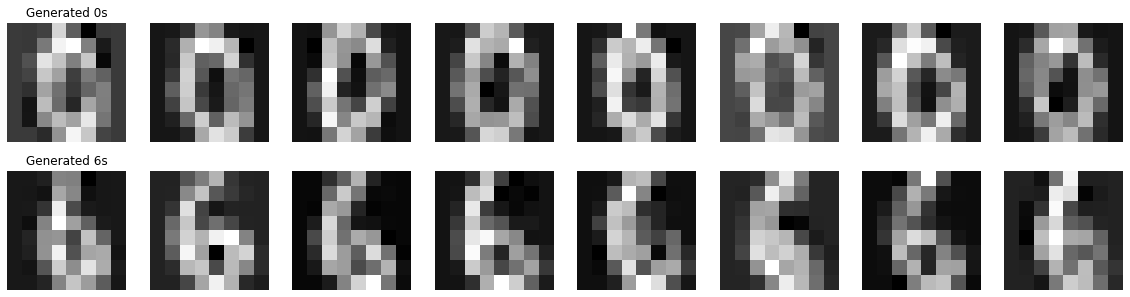

In [25]:
fig,ax = plt.subplots(2,8,squeeze=True,figsize=[20,5])

for i in range(8):
    ax[0,i].imshow(data0[i].reshape(8,8),cmap='gray')
    ax[1,i].imshow(data6[i].reshape(8,8),cmap='gray')
    ax[0,i].axis('off')
    ax[1,i].axis('off')
ax[0,0].set_title('Generated 0s')
ax[1,0].set_title('Generated 6s')


Text(0.5, 1.0, 'Generated 6s')

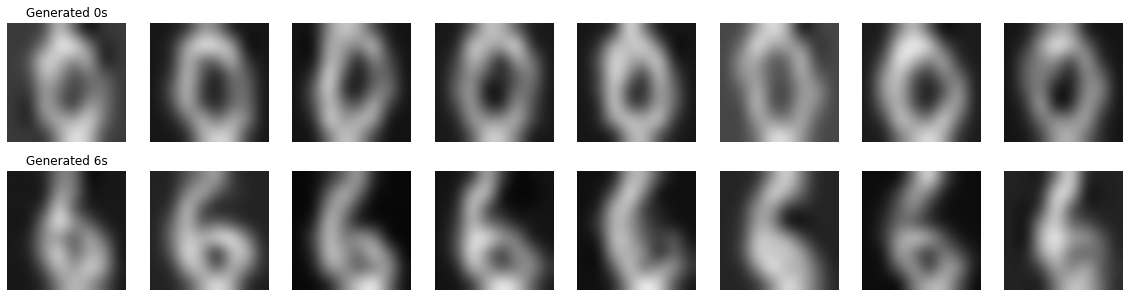

In [26]:
fig,ax = plt.subplots(2,8,squeeze=True,figsize=[20,5])

for i in range(8):
    ax[0,i].imshow(data0[i].reshape(8,8),cmap='gray',interpolation='bicubic')
    ax[1,i].imshow(data6[i].reshape(8,8),cmap='gray',interpolation='bicubic')
    ax[0,i].axis('off')
    ax[1,i].axis('off')
ax[0,0].set_title('Generated 0s')
ax[1,0].set_title('Generated 6s')


In [28]:
#Comment on the quality of the results and possible shortcomings of the method.
display(Markdown('Observation: Quality of the generated results is pretty good. It works for relatively small size of pictures 8x8 pixels, however, it is computationally expensive when the image size increases'))

Observation: Quality of the generated results is pretty good. It works for relatively small size of pictures 8x8 pixels, however, it is computationally expensive when the image size increases